In [1]:
import data
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
import environments
from environments import RosenbrockEnv
import matplotlib.pyplot as plt
import testing
import numpy as np

/Users/I761836/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
training_functions = data.generate_dataset(n = 100, function_type = 'rosenbrock', n_dims=2)

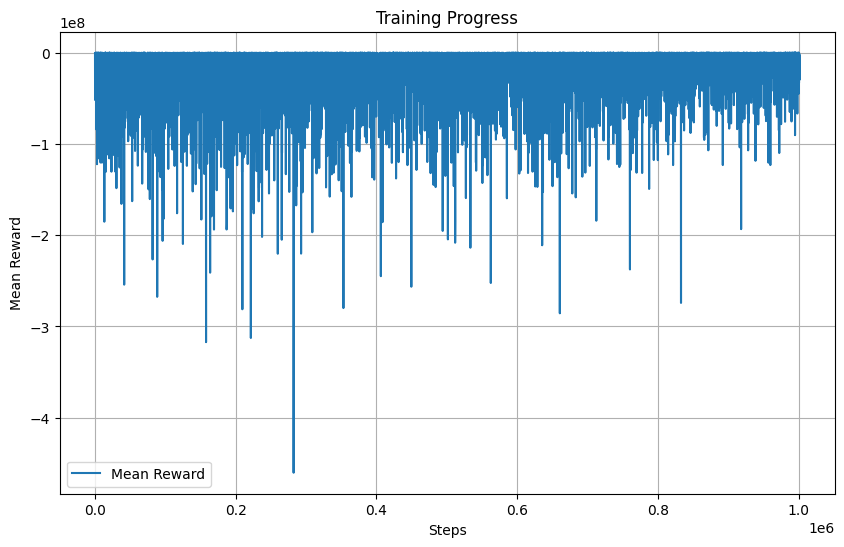

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 73.8          |
|    ep_rew_mean          | -1.03e+07     |
| time/                   |               |
|    fps                  | 139           |
|    iterations           | 489           |
|    time_elapsed         | 7184          |
|    total_timesteps      | 1001472       |
| train/                  |               |
|    approx_kl            | 2.0925654e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.84         |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.12e+13      |
|    n_updates            | 4880          |
|    policy_gradient_loss | -2.08e-05     |
|    std                  | 0.999         |
|    value_loss           | 1.38e+13      |
-------------------------------------------


In [ ]:
env = RosenbrockEnv(functions=training_functions, n_dims=2)
ppo = PPO("MlpPolicy", env, verbose=1, device='mps')
callback = environments.JupyterNotebookPlotCallback()
ppo.learn(total_timesteps = 1e6, callback = callback)

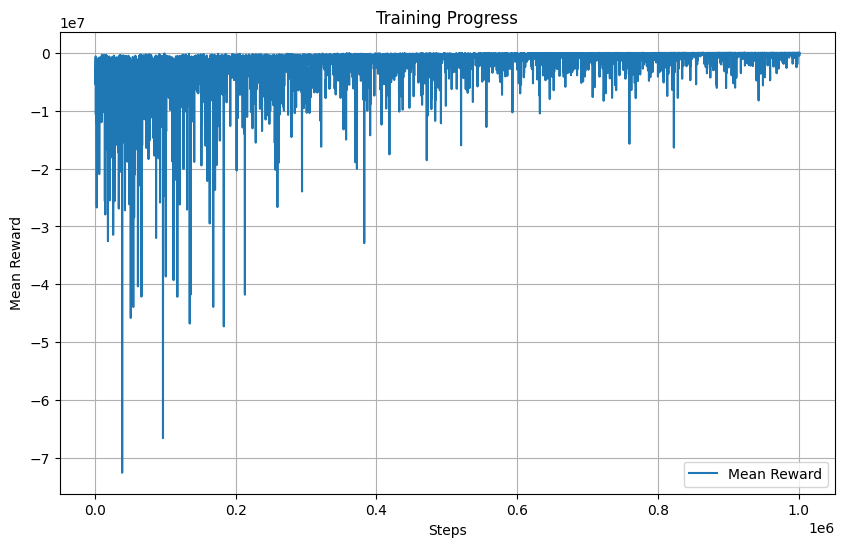

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -3.01e+05    |
| time/                   |              |
|    fps                  | 1819         |
|    iterations           | 489          |
|    time_elapsed         | 550          |
|    total_timesteps      | 1001472      |
| train/                  |              |
|    approx_kl            | 0.0007927353 |
|    clip_fraction        | 0.00552      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.000121     |
|    learning_rate        | 0.0003       |
|    loss                 | 2.23e+10     |
|    n_updates            | 12220        |
|    policy_gradient_loss | -0.00155     |
|    std                  | 0.628        |
|    value_loss           | 3.45e+09     |
------------------------------------------


In [10]:
training_functions = data.generate_dataset(n = 50, function_type = 'rosenbrock', n_dims=2)
callback = environments.JupyterNotebookPlotCallback()
ppo.learn(total_timesteps = 1e6, callback = callback)

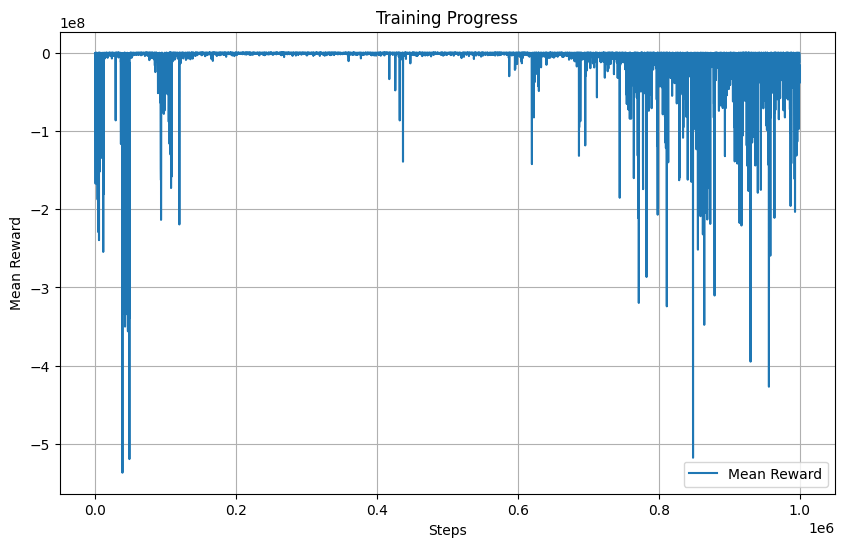

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 89.9      |
|    ep_rew_mean     | -2.29e+07 |
| time/              |           |
|    episodes        | 11572     |
|    fps             | 200       |
|    time_elapsed    | 4981      |
|    total_timesteps | 999993    |
| train/             |           |
|    actor_loss      | 4.92e+06  |
|    critic_loss     | 6.92e+12  |
|    ent_coef        | 2.16e+04  |
|    ent_coef_loss   | -82.6     |
|    learning_rate   | 1e-05     |
|    n_updates       | 999892    |
----------------------------------


In [7]:
env = RosenbrockEnv(functions=training_functions, n_dims=2)
sac = SAC("MlpPolicy", env, verbose=1, device='cpu', learning_rate= 1e-5)
callback = environments.JupyterNotebookPlotCallback()
sac.learn(total_timesteps = 1e6, callback = callback)
sac.save('Rosenbrock_retrained_sac')

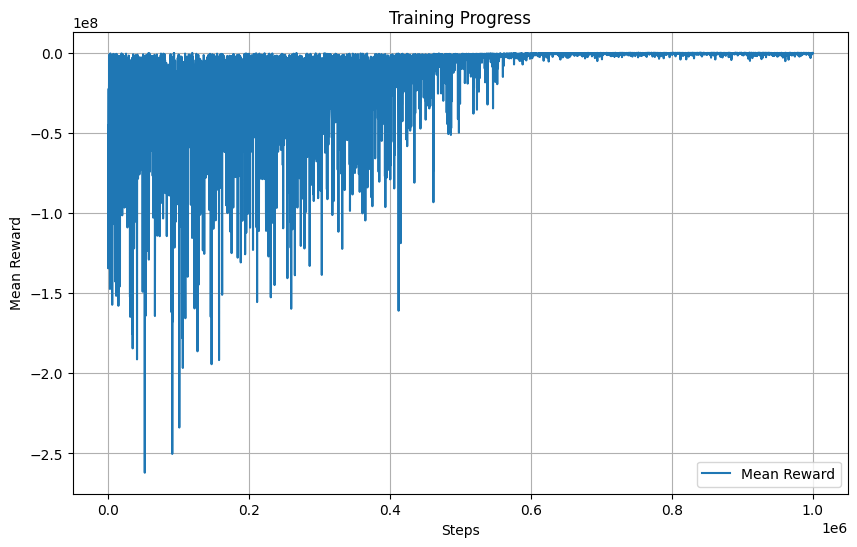

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -6.67e+05 |
| time/              |           |
|    episodes        | 5000      |
|    fps             | 169       |
|    time_elapsed    | 5892      |
|    total_timesteps | 1000000   |
| train/             |           |
|    actor_loss      | 7.72e+07  |
|    critic_loss     | 4.77e+14  |
|    ent_coef        | 2.33e+04  |
|    ent_coef_loss   | 1.7       |
|    learning_rate   | 1e-05     |
|    n_updates       | 3499599   |
----------------------------------


In [30]:
training_functions = data.generate_dataset(n = 50, function_type = 'rosenbrock', n_dims=2)
callback = environments.JupyterNotebookPlotCallback()
sac.learning_rate = 3e-5
sac.learn(total_timesteps = 1e6, callback = callback)

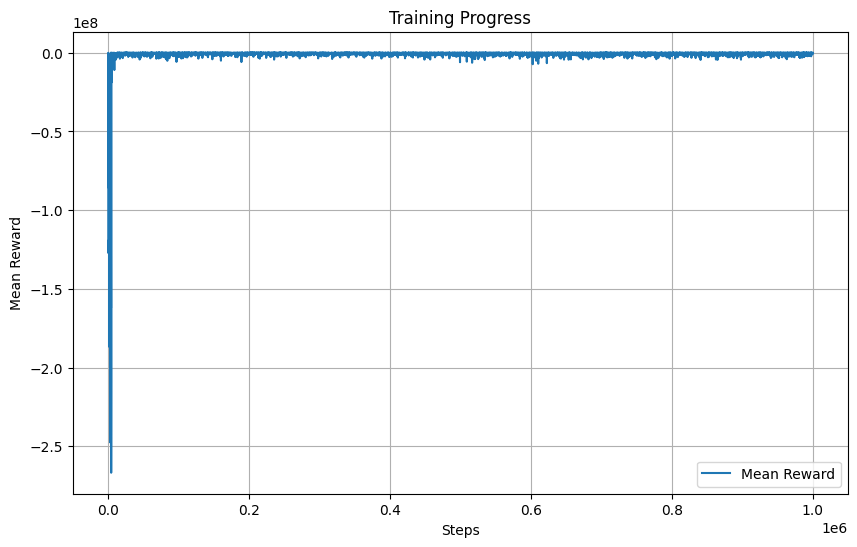

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 87.3      |
|    ep_rew_mean     | -4.01e+05 |
| time/              |           |
|    episodes        | 11588     |
|    fps             | 35        |
|    time_elapsed    | 28352     |
|    total_timesteps | 999962    |
| train/             |           |
|    actor_loss      | 1.77e+04  |
|    critic_loss     | 6.35e+09  |
|    learning_rate   | 1e-05     |
|    n_updates       | 999861    |
----------------------------------


In [8]:
env = RosenbrockEnv(functions=training_functions, n_dims=2)
ddpg = DDPG("MlpPolicy", env, verbose=1, device='cpu', learning_rate= 1e-5)
callback = environments.JupyterNotebookPlotCallback()
ddpg.learn(total_timesteps = 1e6, callback = callback)
ddpg.save('Rosenbrock_retrained_ddpg')

In [33]:
sac.save('Rosenbrock_retrained_sac')
ddpg.save('Rosenbrock_retrained_ddpg')
ppo.save('Rosenbrock_retrained_ppo')

In [2]:
ppo = PPO.load('Rosenbrock_retrained_ppo')
sac = SAC.load('Rosenbrock_retrained_sac')
ddpg = DDPG.load('Rosenbrock_retrained_ddpg')

In [3]:
testing_functions = data.generate_dataset(n = 20, function_type = 'rosenbrock', n_dims=2)
test_env = RosenbrockEnv(functions=testing_functions, n_dims=2)
ppo.set_env(env=test_env)
sac.set_env(env=test_env)
ddpg.set_env(env=test_env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


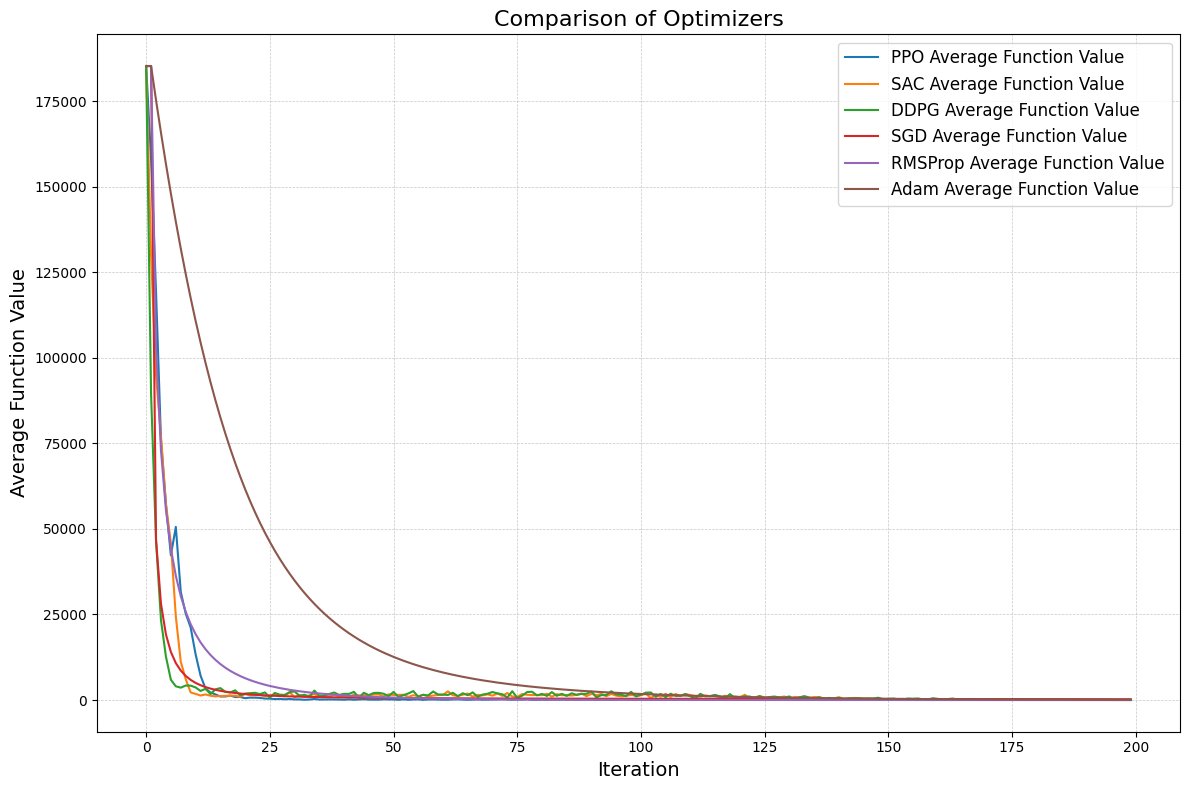

In [4]:
models = {
        'PPO': ppo,
        'SAC': sac,
        'DDPG': ddpg,
        'SGD':None,
        'RMSProp': None,
        'Adam': None,
}
max_iterations = 200
results = testing.run_optimizer_tests(test_env, testing_functions, models, max_iterations = 200, function_type = 'rosenbrock_function')
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)

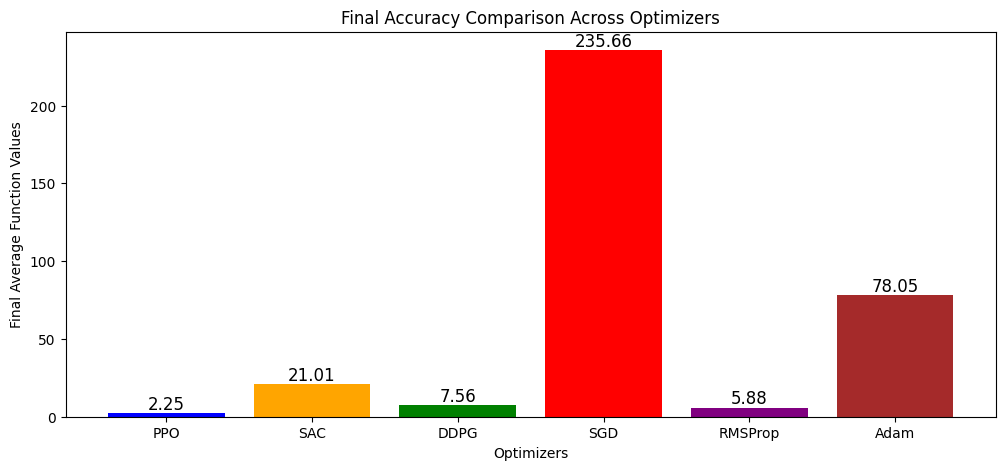

In [5]:
comparison = []
for model_name, data in avg_values.items():
    comparison.append((model_name, data.min()))
testing.plot_final_function_values(comparison)

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def rosenbrock_function(x, a=1, b=100, offset=(0, 0)):
    x0_shifted = x[0] - offset[0]
    x1_shifted = x[1] - offset[1]
    return (a - x0_shifted) ** 2 + b * (x1_shifted - x0_shifted ** 2) ** 2

def plot_rosenbrock_contour_subplot(ax, a, b, offset, trajectory, title, x1_min=-15, x1_max=15, x2_min=-15, x2_max=15, max_iters=200):
    x1_range = np.linspace(x1_min, x1_max, 300)
    x2_range = np.linspace(x2_min, x2_max, 300)
    X1, X2 = np.meshgrid(x1_range, x2_range)

    Z = np.array([
        [rosenbrock_function(np.array([x, y]), a, b, offset) for x, y in zip(row_x, row_y)]
        for row_x, row_y in zip(X1, X2)
    ])

    contour = ax.contourf(X1, X2, Z, levels=30, cmap="viridis")
    path = trajectory[:max_iters]

    ax.plot(path[:, 0], path[:, 1], 'r-o', markersize=3, linewidth=1, label="Trajectory")
    ax.scatter(path[0, 0], path[0, 1], color='green', s=70, label="Start", edgecolors='black', zorder=3)
    ax.scatter(path[-1, 0], path[-1, 1], color='blue', s=70, label="End", edgecolors='black', zorder=3)

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title(title)
    ax.legend()

def plot_multiple_rosenbrock_contours(results, function_params, max_iters=200):
    methods = ['PPO', 'SAC', 'DDPG', 'SGD', 'Adam', 'RMSProp']
    a, b, o1, o2 = function_params
    offset = (o1, o2)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    axes = axes.flatten()

    for i, method in enumerate(methods):
        if method in results:
            trajectory = results[method]['positions']
            plot_rosenbrock_contour_subplot(axes[i], a, b, offset, trajectory, title=method, max_iters=max_iters)
        else:
            axes[i].axis("off")

    plt.show()

In [59]:
import data
testing_functions = data.generate_dataset(n = 1, function_type = 'rosenbrock', n_dims = 2)
env = RosenbrockEnv(functions = testing_functions, n_dims = 2)
ppo.set_env(env=env)
sac.set_env(env=env)
ddpg.set_env(env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


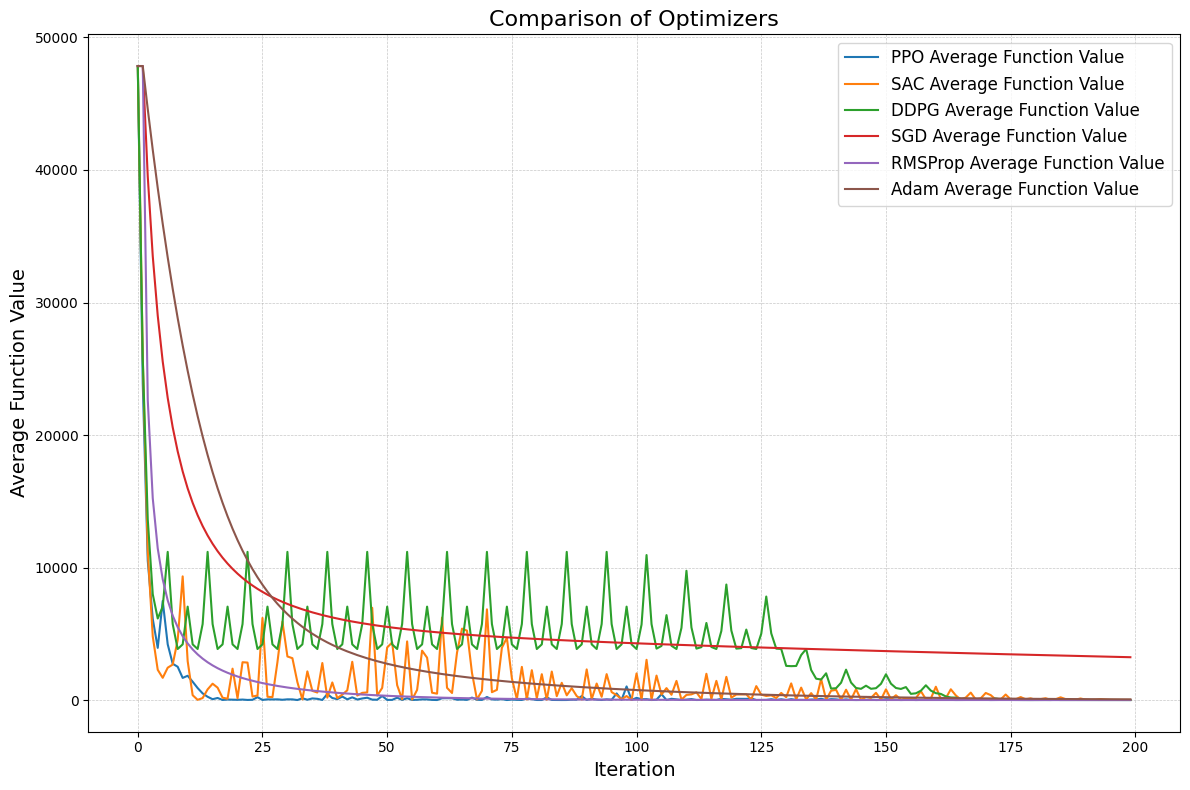

In [60]:
models = {
        'PPO': ppo,
        'SAC': sac,
        'DDPG': ddpg,
        'SGD': None,
        'RMSProp': None,
        'Adam': None,
    }
max_iterations = 200
results = testing.run_optimizer_tests(env, testing_functions, models, max_iterations = 200, function_type = 'rosenbrock_function')
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)

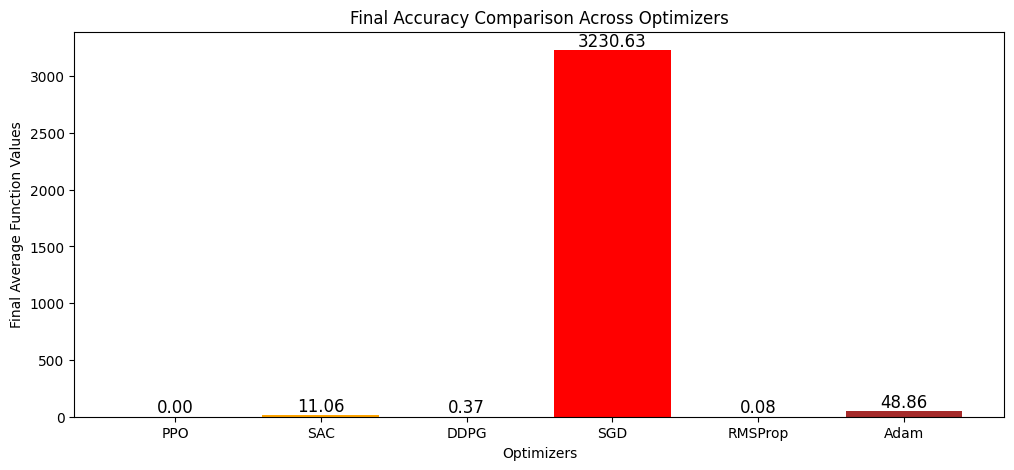

In [61]:
comparison = []
for model_name, data in avg_values.items():
    comparison.append((model_name, data.min()))
testing.plot_final_function_values(comparison)

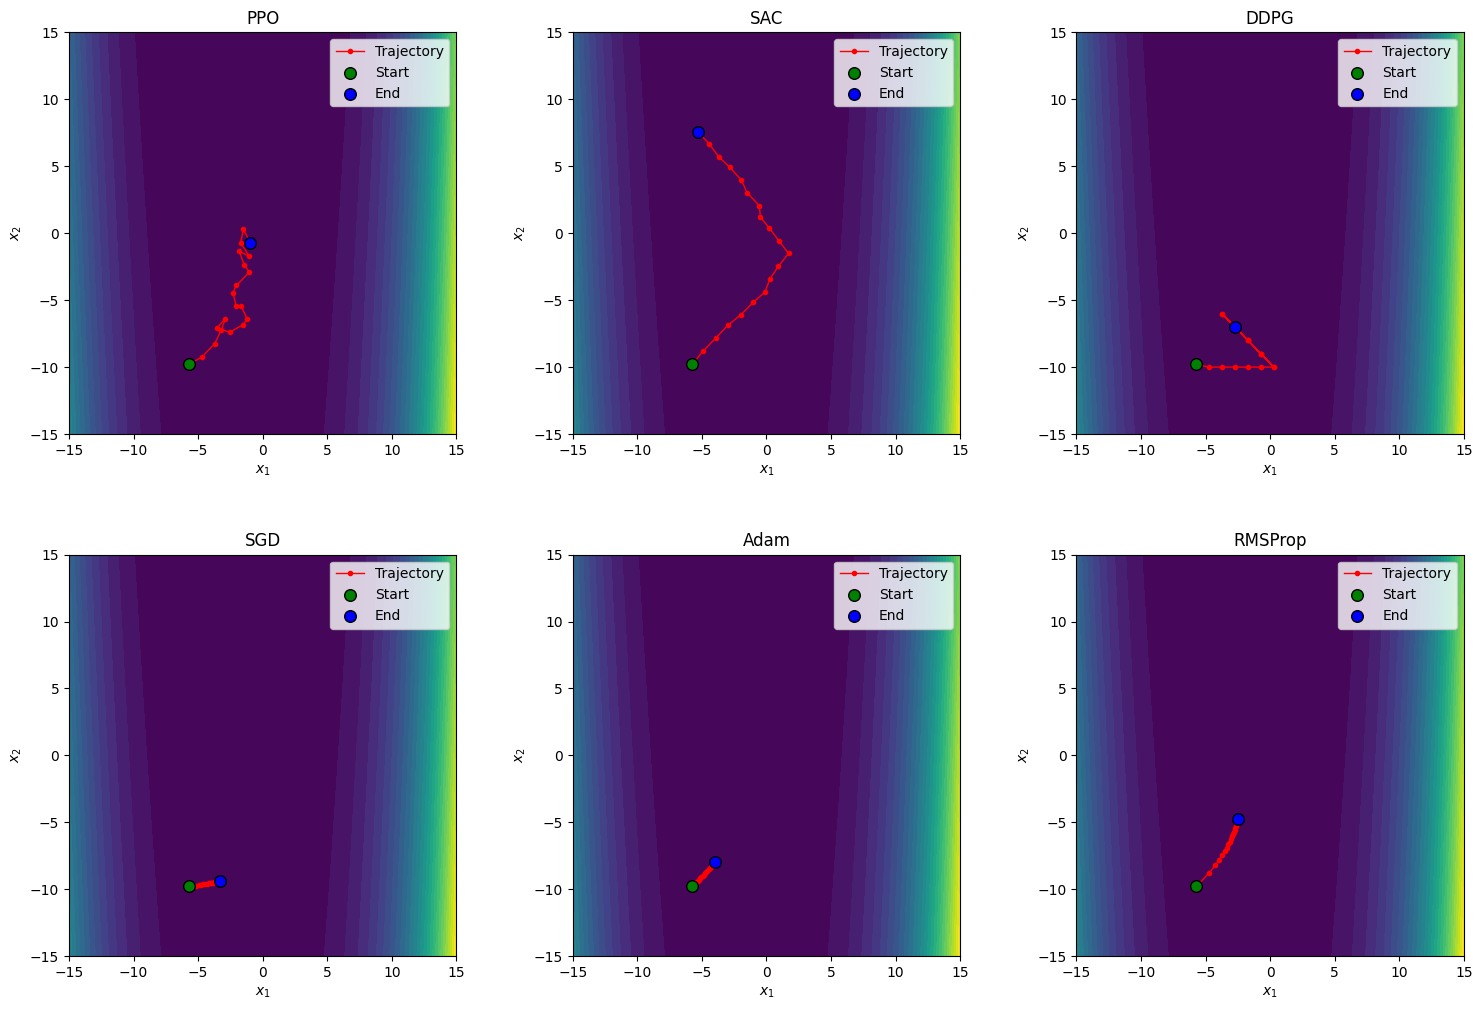

In [62]:
plot_multiple_rosenbrock_contours(results=results, function_params=testing_functions[0], max_iters=20)

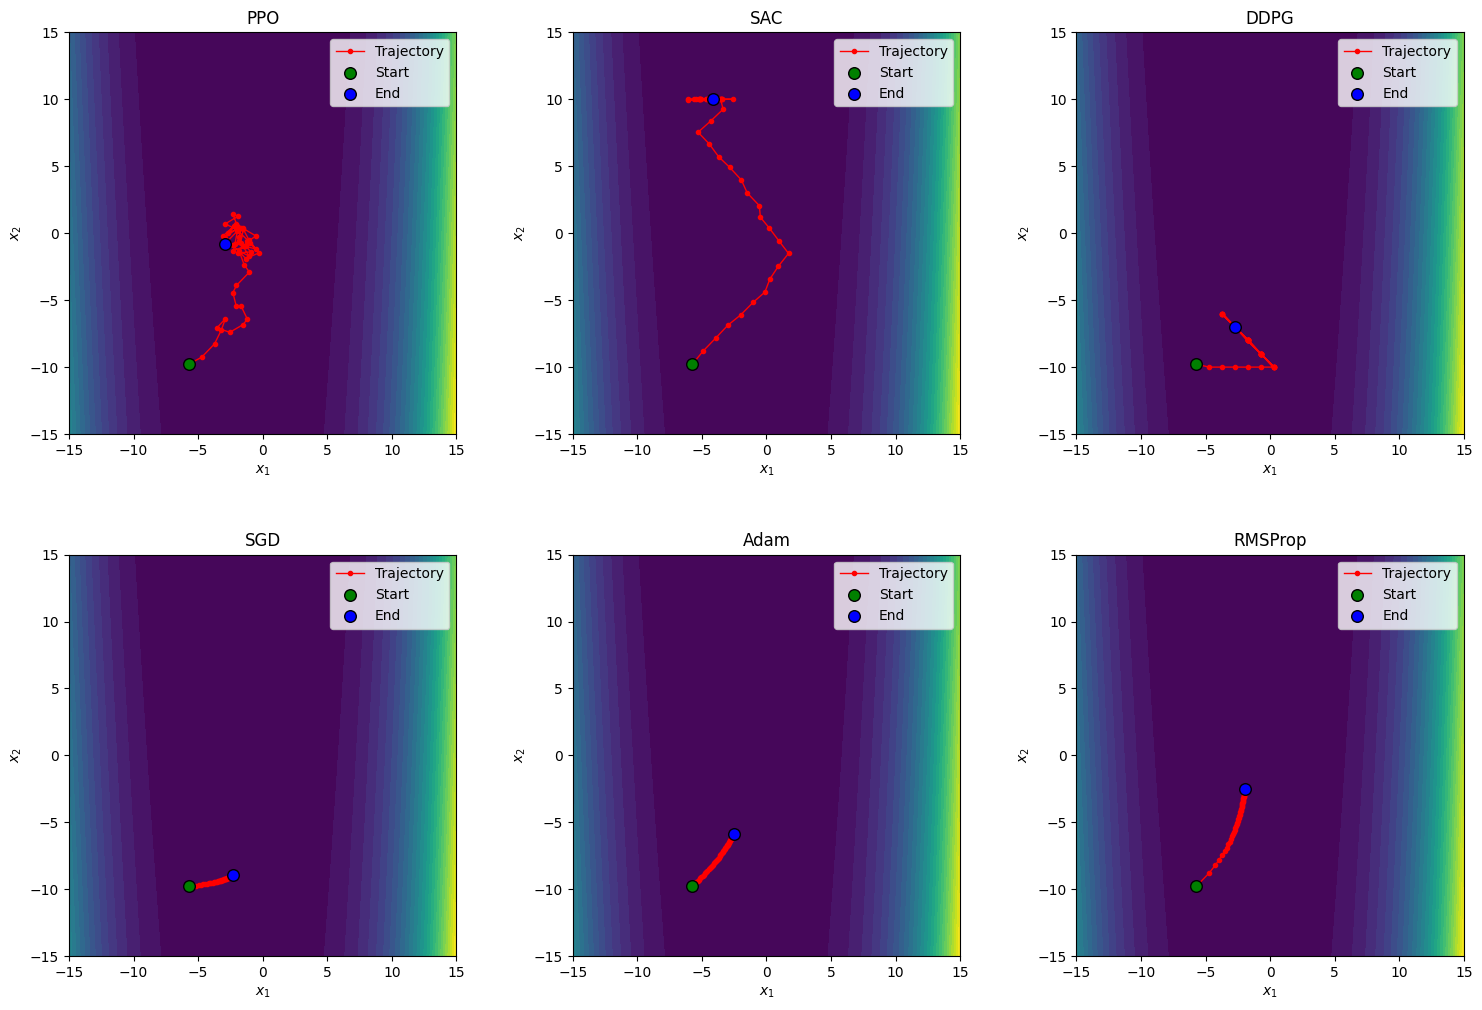

In [63]:
plot_multiple_rosenbrock_contours(results=results, function_params=testing_functions[0], max_iters=50)

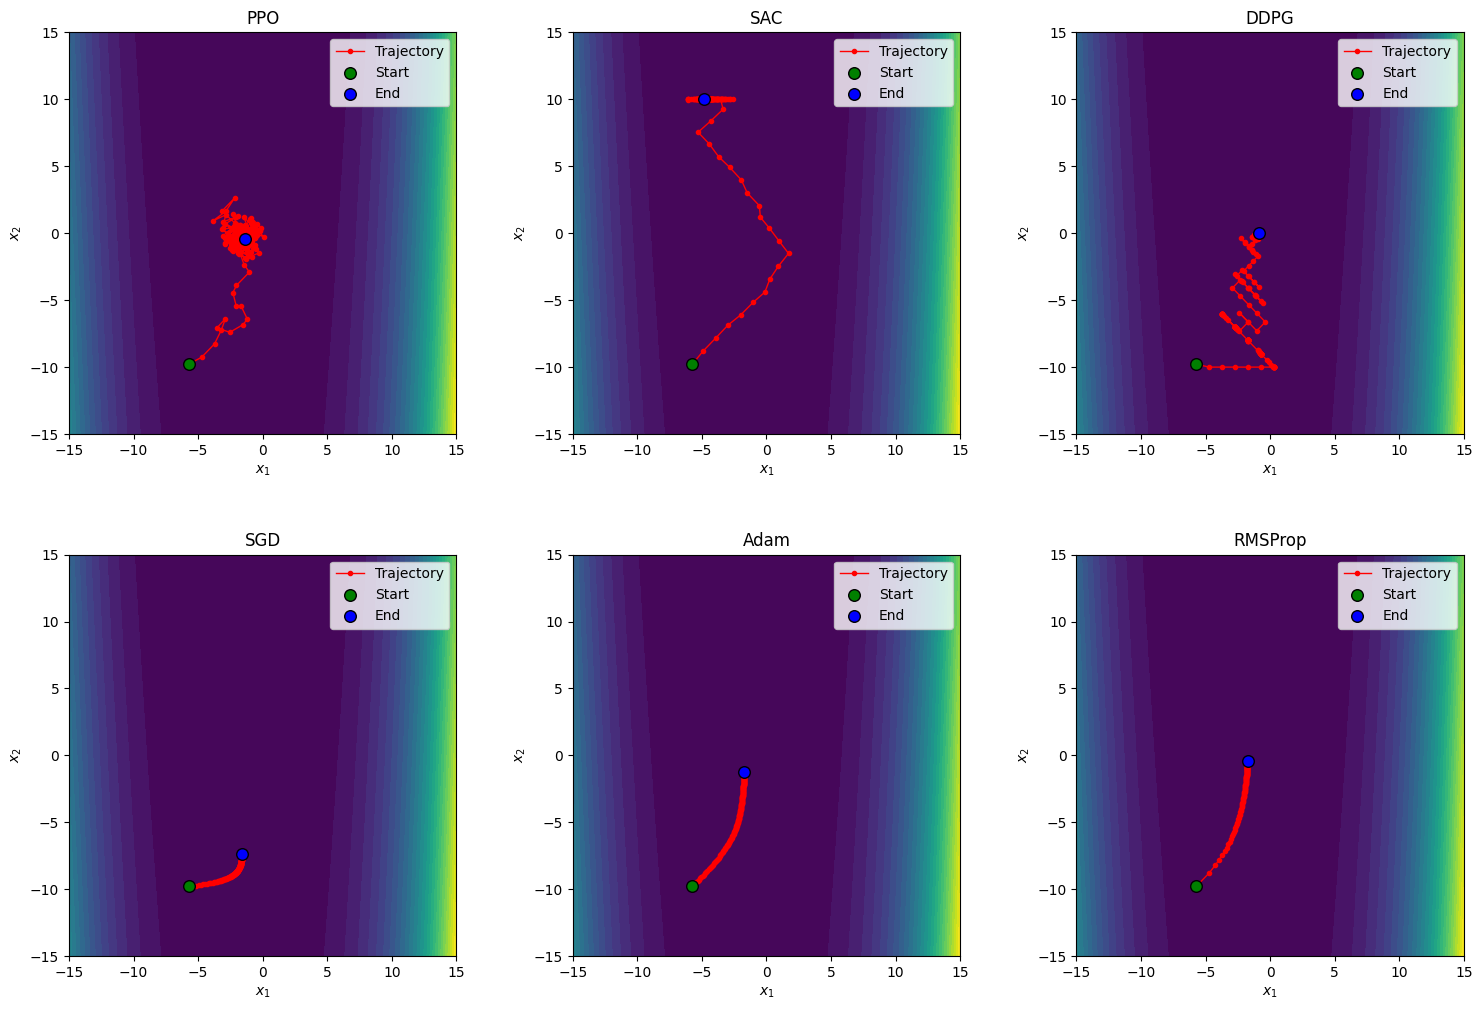

In [64]:
plot_multiple_rosenbrock_contours(results=results, function_params=testing_functions[0], max_iters=200)